In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import rand_score
import networkx as nx
from sklearn.cluster import KMeans
from tqdm import tqdm
import pandas as pd

from preprocess import load_ts_dataset, distance_matrix, epsilon_graph_hard, epsilon_graph_mean
from LINE.clustering_algos import line_clustering
from visualizing import plot_residuals


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



ModuleNotFoundError: No module named 'LINE'

In [1]:
# list of datasets
# ['Adiac', 'ArrowHead', 'Beef', 'BeetleFly', 'BirdChicken', 'Car', 'CBF', 'ChlorineConcentration', 'CinCECGTorso', 'Coffee', 'Computers', 'CricketX', 'CricketY', 'CricketZ', 'DiatomSizeReduction', 'DistalPhalanxOutlineCorrect', 'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxTW', 'Earthquakes', 'ECG200', 'ECG5000', 'ECGFiveDays', 'ElectricDevices', 'FaceAll', 'FaceFour', 'FacesUCR', 'FiftyWords', 'Fish', 'FordA', 'FordB', 'GunPoint', 'Ham', 'HandOutlines', 'Haptics', 'Herring', 'InlineSkate', 'InsectWingbeatSound', 'ItalyPowerDemand', 'LargeKitchenAppliances', 'Lightning2', 'Lightning7', 'Mallat', 'Meat', 'MedicalImages', 'MiddlePhalanxOutlineCorrect', 'MiddlePhalanxOutlineAgeGroup', 'MiddlePhalanxTW', 'MoteStrain', 'NonInvasiveFatalECGThorax1
# select the dataset you want to use 

data_str = 'Coffee'

In [ ]:
#### if data_str = ptb

MAX_LEN = 100
data_normal = pd.read_csv('ptbdb_normal.csv').iloc[:MAX_LEN].to_numpy()
data_abnormal = pd.read_csv('ptbdb_abnormal.csv').iloc[:MAX_LEN].to_numpy()
data = np.concatenate([data_normal, data_abnormal], axis=0)

true_labels = np.concatenate([np.zeros(MAX_LEN), np.ones(MAX_LEN)])

ts_length = len(data[0])
# suffle dataset
shuffl = np.concatenate([data, np.expand_dims(true_labels, axis=1)], axis=1)
np.random.shuffle(shuffl)

data, true_labels = shuffl[:, :ts_length - 1], shuffl[:, -1].astype(np.int64)
DIMENSION = 2

In [ ]:
### else 

dataset = load_ts_dataset(data_str)
data, true_labels = dataset[0], dataset[1]
dist = distance_matrix(data)
dist = dist / np.max(dist)
A = epsilon_graph_hard(dist, epsilon=0.478297)
# A = epsilon_graph_mean(dist)
G = nx.from_numpy_array(A)
DIMENSION = np.max(true_labels) + 1*(0 in true_labels)
DIMENSION


Iteration 100, residual norm 4.013451846601323


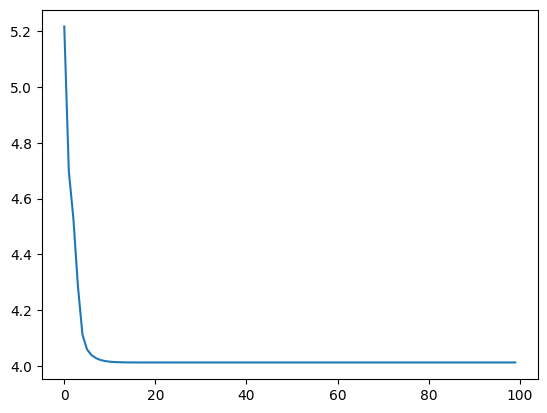

In [5]:
# now, to apply the function, you need to specific the values of epsilon for which you used LINE 

for ep in [0.1 * k for k in range(2,6)]: #here we tested values for epsilon in 0.2 to 0.6
    predicted_clusters = line_clustering(data_str, eps = int(100*ep)/100, d = DIMENSION)
    print(rand_score(true_labels, predicted_clusters), ep)